In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


plt.style.use('seaborn')

# **Supervised Learning**
Supervised learning (SL) is the machine learning task of learning a function that maps an input to an output based on multiple examples of input-output pairs (training data). A Classificator is a ML procedure that learns this function on the training data. 
Let's see an example:

# Iris dataset - Kneighbour Classifier

The iris dataset (https://www.mghassany.com/MLcourse/img/iris.png). It contains data about flowers and their label. 
The data-points have 4 features, for the sake of visualization we will do a plot over the first two: 

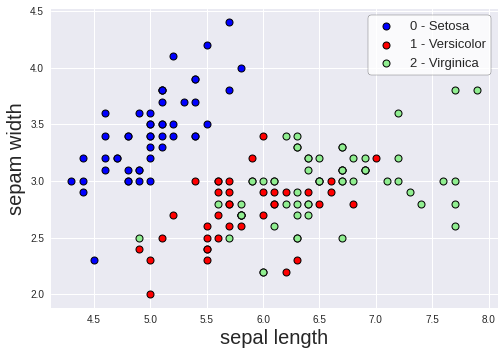

In [65]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target
X[:,3]=X[:,3]*100                    # petal width in millimeters


plt.scatter(X[:,0][y==0],X[:,1][y==0], c='blue',  linewidth=1, edgecolor='black')
plt.scatter(X[:,0][y==1],X[:,1][y==1], c='red',  linewidth=1, edgecolor='black')
plt.scatter(X[:,0][y==2],X[:,1][y==2], c='lightgreen',  linewidth=1, edgecolor='black')

plt.rc('font', size=12)   
plt.xlabel('sepal length',fontsize=20)
plt.ylabel('sepam width', fontsize=20);
labels=['0 - Setosa', '1 - Versicolor', '2 - Virginica']


plt.legend( labels, frameon=True, fontsize=13, facecolor='white', edgecolor='black')
plt.show()


Now we want to build a classifier that is able to tell us the type of the flower given a new feature vector.
Here we will see one of the simplest classifier possible: the **K-neighbour Classifier**. It works as follows: when you want to classify a new data-point the algorithm looks in the training data for the K points with the least euclidean distance from it and does a majority vote between thei labels.

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=314)  # train test split to evaluate the performance

#create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=10)        # K=10
#fit the model
knn.fit(X_train, y_train)
#do the prediction on the 'X_test' vectors
y_pred=knn.predict(X_test)

print('Train score  = ',knn.score(X_train,y_train))      
print('Test score   = ',knn.score(X_test,y_test))

Train score  =  0.9732142857142857
Test score   =  0.9210526315789473


We built our first classifier! It has a test score of 0.92, not bad! 
All good but we made the **WORST** possible mistake in using machine learning, we used a model without having any clue of what it does or what is going on!

So how does the K-neighbour Classifier works?

It works as follows: when you want to classify a new data-point the algorithm looks in the training data for the K points with the least euclidean distance from it and does a majority vote between thei labels.

We can already see that there is a problem. In principle all features have the same importance but in the computation of the euclidean distances the features that are characterized by the highest numerical values have greater importance! (for example if we are dealing with trees the difference in the length of the leaves is mere noise compared to the differences in the length of the trunks). In our case we also have that the 'petal width' is expressed in millimeters while the other features in centimeters. This confers unmotivated importance to that feature!

Now, since we know how the classifier works, we can address this problem.
The solution is simple, we rescale all the features making them assume values between 0 and 1.




In [67]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler().fit(X)              # fit the transformation
X_scaled=scaler.transform(X)                              # apply the transformation
print(scaler.inverse_transform(X_scaled)[0,:])            # inverse transformation
print(X[0,:])


[ 5.1  3.5  1.4 20. ]
[ 5.1  3.5  1.4 20. ]


In [68]:

X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

knn_scaled = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_scaled.fit(X_train_scaled, y_train)

print('Test score   = ',knn_scaled.score(X_test_scaled,y_test))



Test score   =  0.9736842105263158


Just by knowing how does the algorithm we increased out predictive perfomance by 5.2% !!

The K-neighbour Classifier can work both as an hard classifier (just gives the predicted class) or as a soft classifier (gives the probabilities for each possible class)



In [69]:
trial = scaler.transform(np.array([6, 3, 3, 200]).reshape(1,-1))             # we can see from the plot above that is in the gray zone between 1 and 2
# call the "predict" method:
result = knn_scaled.predict(trial)
print('Hard classification is: ')
print(labels[result[0]])
print('Soft classification is:')
print('P(Setosa) = ',knn_scaled.predict_proba(trial)[0,0], '     P(Versicolor) = ',knn_scaled.predict_proba(trial)[0,1],
      '     P(Virginica) = ',knn_scaled.predict_proba(trial)[0,2])

Hard classification is: 
1 - Versicolor
Soft classification is:
P(Setosa) =  0.0      P(Versicolor) =  0.6      P(Virginica) =  0.4


The hard classification is sure that the flower is a Versicolor but from the soft classification we see that he point was quite hard to classify. In the case of flowers this is not a big deal but in the following we will see how this can be extremely important.

# Breast Cancer Data - Logistic Regression

Let's change data and classification algorithm. Here we have labelled data about clumps in breasts.
We have 9 features expressed in integers between 1 qnd 10 and the label: 2 for benign clumps and 4 for malignant clumps:

**Wisconsin breast cancer data**

Attribute Information:

1. Sample code number: id number   (*not counted as a feature*)
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
dataset.columns=['Id ','Thickness','Unif.Size','Unif.Shape','Marginal_Ad.','S.E._Size','Bare_Nuclei','Bl.Chrom.','Norm.Nucl.','Mitoses','Class']

i=0                                    # here we delete the uncomplete data
while i<(X.shape[0]):
  if '?' in X[i,:]: 
    X = np.delete(X, (i), axis=0)
    y = np.delete(y, (i), axis=0)
  i+=1

print(X.shape)
dataset



(683, 9)


,Id,Thickness,Unif.Size,Unif.Shape,Marginal_Ad.,S.E._Size,Bare_Nuclei,Bl.Chrom.,Norm.Nucl.,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


The classification algorithm that we will use is the **Logistic Regression**. 

Almost all ML algorithms depend on some manually tuned "hyperparameters" (unlike normal model "parameters" that are automatically learned from the training data). Those can heavily influence the prediction outcomes and performance.
Usually in ML context we talk about *hyperparameters tuning* to address overfitting issue.
Here instead we will give an example of how understanding what is happening allows us to adjust the hyperparameters to make an algorithm have the desired behavior.

***DISCLAIMER***

Any tuning of the hyperparameters done to optimize the behaviour on the test data is a serious ***crime***. We must pretend to not know about the existence of the test data until the very end when we want to know what is the test error/accuracy of our model. The tunings/adjustements must be done on the **validation** set.


In [71]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=1)
X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)   # 15% test and 15% validation

print(X_train.shape[0])
print(X_valid.shape[0])
print(X_test.shape[0])

478
103
102


Let's train a model on the training data and see how the confusion matrix looks like on the validation test.

The confusion matrix goes beyond telling us the score of the model. Looking at it we can see how many false-negative/false positive we have:

[[65  2]
 [ 2 34]]


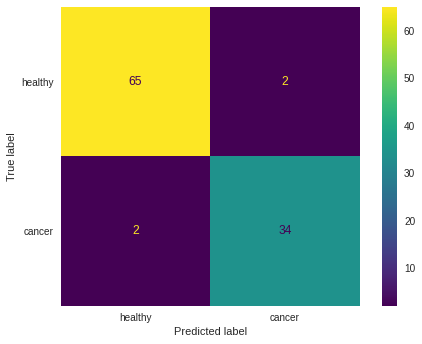

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


model_c=LogisticRegression() 
model_c.fit(X_train,y_train)                                #fitting the model
y_pred = model_c.predict(X_valid)                           #making prediction on validation
prob=model_c.predict_proba(X_valid)
cm = confusion_matrix(y_valid, y_pred)


print(cm)                                                  

disp=ConfusionMatrixDisplay(cm, display_labels=['healthy','cancer'])
disp.plot()
plt.rcParams.update({'font.size': 30})
plt.grid(False)
plt.show()

The model has a very good performace it has just 4 errors on 104 predictions!

But there is an issue. We are telling to 2 people that they are healthy while they have a cancer! If a doctor would use our model to see which people should get a treatment we are essentially condemning them to death.

What can we do to solve the issue?

The logistic regression can work both as an hard or as a soft classifier. The default version that we used is an hard classifier that siply gives the label of the class with the highest probability 

$$Sick \text{ if }P(Sick)>0.5$$

If we are keen on not wanting to tell to sick people that they are healthy we can lower the threshold  

$$Sick \text{ if }P(Sick)>T$$

If $T$ is lower than $0.5$ we will tell more people that they are sick. This, in principle, reduces the number of healthy predicted sick people at the cost of increasing the number of sick predicted healthy people. 
If we are not carefull with our choiche we can lose the predictive capabilities of our algorithm!

Fortunately we can check the behavior of the predictive capacity  on the validation set for different values of $T$.


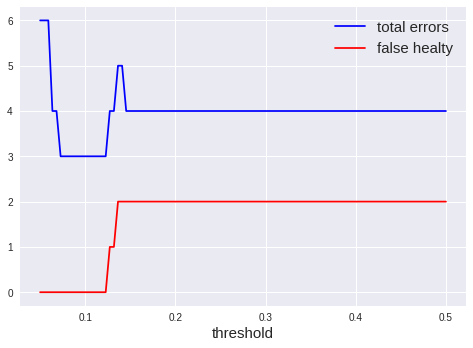

In [73]:
total_error = np.zeros(0)
false_healthy = np.zeros(0)
threshold=np.linspace(0.05,0.5,100)

y_treshold=np.zeros(X_valid.shape[0])


for thr in threshold:
  y_treshold=np.zeros(X_valid.shape[0])
  for i in range(len(y_treshold)):
    if prob[i,1]>=thr:
      y_treshold[i]=4
    else:
      y_treshold[i]=2
  cm = confusion_matrix(y_valid, y_treshold)
  total_error = np.append(total_error,cm[0,1]+cm[1,0])
  false_healthy = np.append(false_healthy, cm[1,0])

plt.plot(threshold,total_error, c='blue', label='total errors')
plt.plot(threshold, false_healthy, c='red',label='false healty')
plt.xlabel('threshold', fontsize=15)
plt.legend(loc="upper right", fontsize=15)


Setting $T=0.1$ we have 0 false negatives just 3 false positives.
We also reduced the total error from $4/104$ to $3/104$ thus reducing also the total error! (altough this is not a general behaviour)

Now, as a last step, we can check the confusion matrix on the test set:

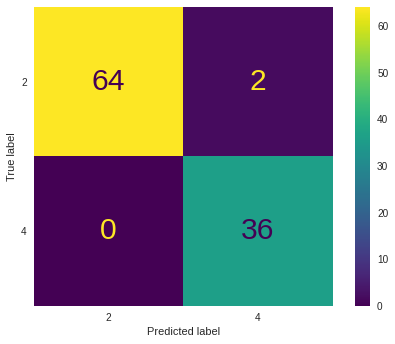

In [74]:
prob=model_c.predict_proba(X_test)
y_treshold=np.zeros(X_test.shape[0])


for i in range(len(prob)):
    if prob[i,1]>=0.1:
      y_treshold[i]=4
    else:
      y_treshold[i]=2

cm = confusion_matrix(y_test, y_treshold)
disp=ConfusionMatrixDisplay(cm, display_labels=[2,4])
disp.plot()
plt.rcParams.update({'font.size': 30})
plt.grid(False)
plt.show()


We are super happy about the result! Just for reference, let's check the confusion matrix if we stayed with the original model:



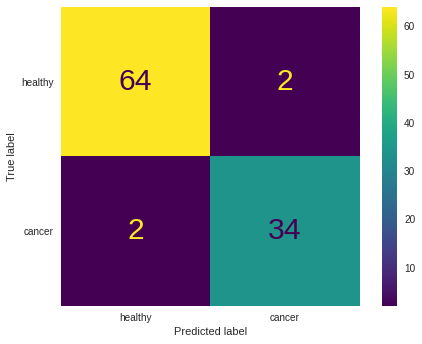

In [75]:
y_pred = model_c.predict(X_test)                           #making prediction on validation
cm = confusion_matrix(y_test, y_pred)



disp=ConfusionMatrixDisplay(cm, display_labels=['healthy','cancer'])
disp.plot()
plt.rcParams.update({'font.size': 30})
plt.grid(False)
plt.show()

Still two false negative! We made the right choice. This example clearly shows that **it is essential to have a ceratin degree of understanding of the model that we are using!**

# Ensembling 
Ensembling strategies are ways to combine a certain number of weak classifier in to a strong classifier.

**What is a weak classifier?** A classifier whose prediction are *weakly* correlated to the real label (still it must perform better than random guessing otherwise there is nothing to learn from it!). Usually weak classifiers are simple and fast.

**What is a strong classifier?** A good classifier. 

There are two types of Ensembling strategies:

**Parallel** : the weak classifiers can be trained in parallel and are independent from each other. (example Bagging)

**Sequential** : the weak classifiers are trained one after the other in a sequence. Each one makes use of the predictions of the previous ones. (Example Boosting)

# Bagging - DecisionTree --> RandomForest

Bagging is really simple:

 Suppose we have $N$ data points and a weak classifier. We build $M$ datasets drawing (**with replacement**) for each one of them $N$ points from the original sample. Each of these new $M$ samples (*bags*) will contain some repeted points of the original dataset and not contain some of them.

On all $M$ samples we train the weak classifier and when we have to do a prediction we just do a majority vote.

Why it works?

The idea is to use high variance (*unstable*) classifiers that are higly sensitive to variation in the training data. The bagging techniques is a way to have slightly different training sets (that still somehow mimic the variation that could exist between different real datasets). The high variance weak classifier prediction will be very different depending on the bag it has been training on and he final majority vote *should* cancel out the high variance


The weak classifier that we will use is the **DecisionTree**. The strong classifier built on it with bagging is called **RandomForest**.

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.spatial import distance

plt.style.use('seaborn')

We will use an easily visualizable 2D sintetic dataset:

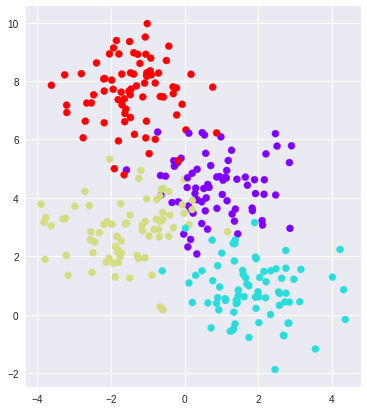

In [76]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=350, centers=4, random_state=0, cluster_std=1.0)      # sintetic data
X_train, y_train = X[0:300,:], y[0:300]
X_test,  y_test  = X[300:,:],  y[300:]

plt.figure(figsize=(6,7))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='rainbow');

Let's plat with our weak classifier. The main parameter of a tree is its maximum depth:

In [77]:
gx = np.linspace(-4.5, 4.5, 256)                         # procedure to create two vector that contain the x and the y of the 256x256 points that fill the space 
gy = np.linspace(-3, 11, 256)                            # ranging from x=(-4.5 to 4.5) and y=(-3 to 11)
gx, gy = np.meshgrid(gx, gy)
gx, gy = gx.reshape(-1), gy.reshape(-1)

def fit_randomized_tree(depth=0):

    model_l = DecisionTreeClassifier(max_depth=depth, random_state=5)
    model_l.fit(X_train, y_train)
    y_hat = model_l.predict(np.c_[gx, gy])             #np.c creates a Nx2 matrix from two N lenght vectors

    plt.figure(figsize=(6,7))                                               
    plt.scatter(gx, gy, c=plt.cm.rainbow(y_hat / 4), alpha=0.2, s=10)
    plt.scatter(X_train[:, 0], X_train[:, 1], s=60, c=y_train, cmap='rainbow');
    

from ipywidgets import interact
interact(fit_randomized_tree, depth=(1, 15));              #why the behaviour seems to 'saturate' ?

interactive(children=(IntSlider(value=1, description='depth', max=15, min=1), Output()), _dom_classes=('widget…

Sadly teh Sklearn implementation of the DecisionTree can just 'ask questions' about one feature at a time in the building of the tree so a tree by itseld is not able to discriminate trough *oblique* lines.

Now we will learn 4 DecisionTree on 4 different bags and see if we have the required variance:

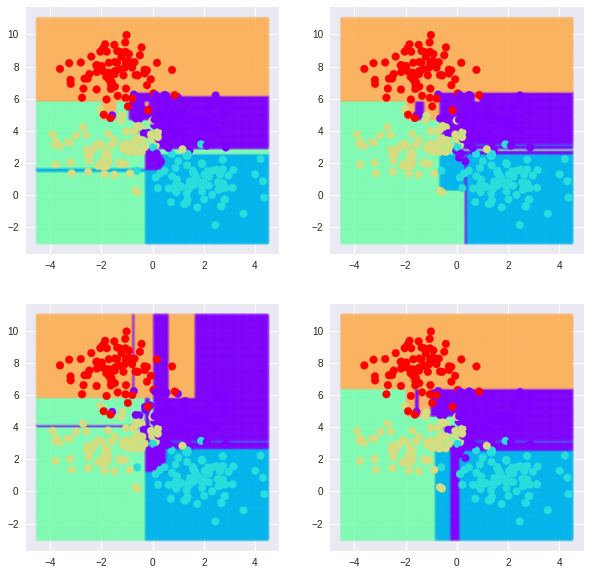

In [78]:
np.random.seed(1)

model_l = DecisionTreeClassifier(max_depth=15, random_state=5)
idx=np.random.randint(len(X_train[:,1]), size=len(X_train[:,1]))  # bag 1
model_l.fit(X_train[idx,:], y_train[idx])
y_hat_l = model_l.predict(np.c_[gx, gy]) 

model_m = DecisionTreeClassifier(max_depth=15, random_state=5)
idx=np.random.randint(len(X_train[:,1]), size=len(X_train[:,1]))  # bag 2
model_m.fit(X_train[idx,:], y_train[idx])
y_hat_m = model_m.predict(np.c_[gx, gy])       

model_c = DecisionTreeClassifier(max_depth=15, random_state=5)
idx=np.random.randint(len(X_train[:,1]), size=len(X_train[:,1]))  # bag 3
model_c.fit(X_train[idx,:], y_train[idx])
y_hat_c = model_c.predict(np.c_[gx, gy])      

model_g = DecisionTreeClassifier(max_depth=15, random_state=5)
idx=np.random.randint(len(X_train[:,1]), size=len(X_train[:,1]))  # bag 4
model_g.fit(X_train[idx,:], y_train[idx])
y_hat_g = model_g.predict(np.c_[gx, gy])      


fig, ax  = plt.subplots(2, 2, figsize=(10, 10))


ax[0,0].scatter(gx, gy, c=plt.cm.rainbow(y_hat_l/ 4), alpha=0.2, s=10)
ax[0,0].scatter(X_train[:, 0], X_train[:, 1], s=60, c=y_train, cmap='rainbow')

ax[0,1].scatter(gx, gy, c=plt.cm.rainbow(y_hat_m/ 4), alpha=0.2, s=10)
ax[0,1].scatter(X_train[:, 0], X_train[:, 1], s=60, c=y_train, cmap='rainbow')

ax[1,0].scatter(gx, gy, c=plt.cm.rainbow(y_hat_c/ 4), alpha=0.2, s=10)
ax[1,0].scatter(X_train[:, 0], X_train[:, 1], s=60, c=y_train, cmap='rainbow')

ax[1,1].scatter(gx, gy, c=plt.cm.rainbow(y_hat_g/ 4), alpha=0.2, s=10)
ax[1,1].scatter(X_train[:, 0], X_train[:, 1], s=60, c=y_train, cmap='rainbow')

Indeed, we have an high variance.
For reference, let's see what is the score on the test set of one of them:

In [79]:
model_c.score(X_test,y_test)

0.9

It could seem high but it is just that the data is incredibly simple.

The RandomForest classifier is just the majority vote between the 4 models:


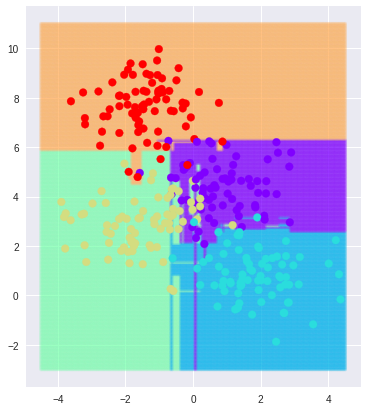

test score =  0.96


In [80]:
gx = np.linspace(-4.5, 4.5, 256)                         # procedure to create two vector that contain the x and the y of the 256x256 points that fill the space 
gy = np.linspace(-3, 11, 256)                            # ranging from x=(-4.5 to 4.5) and y=(-3 to 11)
gx, gy = np.meshgrid(gx, gy)
gx, gy = gx.reshape(-1), gy.reshape(-1)


model_l = RandomForestClassifier(n_estimators=4, max_depth=15 ,random_state=3)
model_l.fit(X_train, y_train)
y_hat = model_l.predict(np.c_[gx, gy]) 


plt.figure(figsize=(6,7))                                     #np.c creates a Nx2 matrix from two N lenght vectors
plt.scatter(gx, gy, c=plt.cm.rainbow(y_hat / 4), alpha=0.2, s=10)
plt.scatter(X_train[:, 0], X_train[:, 1], s=60, c=y_train, cmap='rainbow');
plt.show()

y_train_prediction=model_l.predict(X_train)
y_test_prediction=model_l.predict(X_test)



print('test score = ',model_l.score(X_test,y_test))


We see that we have a much better score and that the RandomForest classification of the space makes much more sense.

Little disclaimer: in our implementation of the random forest the 4 DecisionTree are not the  above ones. We did not do the mojority vote between them becuase we wanted to show a RandomForest implementation for future references.

# Boosting - AdaBoost



Boosting works building a sequence of classificator models. Each model of this sequence is trying to fix the prediction errors of the previous one. Also each model has an associated score.

At the end we will have a sequence of classifiers, each one of them specialized on the failures of the previous one and the procedure ends doing the final prediction with a 'weighted voting' using the model scores to weigh the single models vote.

It may seems complicated but it is really simple, the procedure is more clear if we look at the AdaBoost algorithm:

*For simplicty we will deal with binary classification*

https://www.analyticsvidhya.com/blog/2021/09/adaboost-algorithm-a-complete-guide-for-beginners/

(starting from the '*Understanding the working of AdaBoost Algorithm*' section)

The final prediction is:

$$H(x)=sign\bigg(\sum_i \alpha_i h_i(x)\bigg)$$

Where $\alpha_i$ is the importance of the $i^{th}$ weak classifier and $h(x)$ is its prediction.

Let's try it on a real dataset: 

**Banknote authentication Data Set** 

Data Set Information:

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

(https://en.wikipedia.org/wiki/Wavelet_transform)


Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer) :  0 for authentic, 1 for fake

In [81]:
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt', header=None)
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values
dataset.columns=['Variance_W.T.I','Skewness_W.T.I','Curtosis_W.T.I','I.Entropy','Class']
print(X.shape)
dataset

(1372, 4)


,Variance_W.T.I,Skewness_W.T.I,Curtosis_W.T.I,I.Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


The weak learner can be any kind of classificator. Since we have to train a sequence of them and the task can not be parallelized we used a 'Stump' that is a tree with a depth of 1.

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

weak_classifier = DecisionTreeClassifier(max_depth=1,random_state=5)                            # here we define the weak classifier                
strong_classifier = AdaBoostClassifier(n_estimators = 50, base_estimator = weak_classifier)     # here we build the strong classifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=314)  

model = strong_classifier.fit(X_train, y_train)


In [83]:
model.score(X_test,y_test)

1.0

In this notebook we have seen different classification techniques but we never really discussed how to tune their hyperparamethers to maximize their predictive capacities. We will deal with this problem in the "Validation" notebook.

Indeed an impressive result.

# Exercise: image recognition


The data consists in tic-tac-toe ending grids.

We have data for 958 games. Each grid is a 9 dimensional vector (first row of the grid correpsonds to the first 3 components, second row to the elements from 4 to 6 and last row to the elements from 7 to 9). The elements of the vector are 'x' for the cross, 'o' for the circle, and 'b' for the empty space.

For each grid we have a label that indicates if the cross win (positive) or not (negative)



In [96]:
dataset = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data", header=None)
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [110]:
for i in range(len(X[:,1])):
  for j in range(len(X[1,:])):
    if X[i,j]=='o':
      X[i,j]=-1
    elif X[i,j]=='x':
      X[i,j]=1
    elif X[i,j]=='b':
      X[i,j]=0

X=X.astype('int')

for i in range(len(y)):
    if y[i]=='negative':
      y[i]=0
    elif y[i]=='positive':
       y[i]=1

y=y.astype('int')




here we converted the data in numerical values to perform the analysis.


1.   We used 1 for 'x', 0 for 'b' and -1 for 'o'. Do you think we could have used something like 5 for 'x', 1 for 'b' and 0 for 'o'? Why?
2.   Find a way to visualize the 3x3 grids (it is NOT necessary to have crosses and circles, the different states just need to have a different representation)
3.  Train a model to recognize if the cross wins from the image, what is the performance? Plot the confusion matrix.
4.  Suppose that for memory problem we can just store a 3 dimensional vector for the each grid. Riduce the dimensionality of the data to 3 with PCA, train a model on the projection, what happens to the performance? Why? Plot the confusion matrix.
5.  What could we do to bias our predictor in having fewer false positive/negative?


Solution 1

We can not use 5 for 'x', 1 for 'o' and 0 for 'b' becuse in this way we are creating a distance hierarcy between the states. With 1 -1 and 0 we have that both states are equally distant from the 'null' state that is generally a good practice. 


Another possibility is to one-hot encode the data with 10 for 'x', 01 for 'o' and 00 for 'b'. If we use distance based algorithms this is exactly equivalent to 1 -1 and 0. If we use algoritm like logistic regression it is slightly different because doubling the dimensionality of the data our weight vector w has 2 times the number of components. 

Solution 2

We use the same procedure of the digits dataset with a 3x3 grid

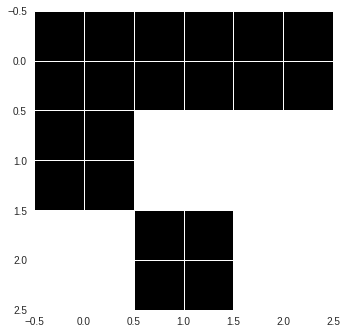

the label is  1  so x wins 
 



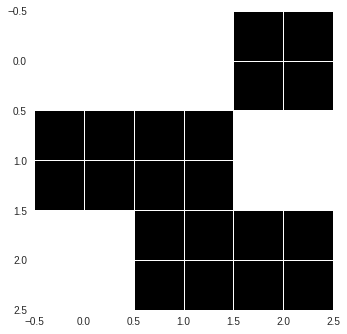

the label is  0  so x does not wins


In [86]:
plt.imshow(X[1,:].reshape((3,3)))
plt.show()
print('the label is ', y[1], ' so x wins \n \n' )

plt.imshow(X[-1,:].reshape((3,3)))
plt.show()
print('the label is ', y[-1], ' so x does not wins' )


 Solution 3

Here we try a logistic regression

[[ 96   8]
 [  0 184]]


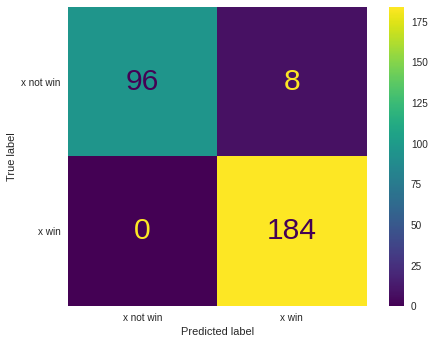

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

model_c=LogisticRegression() 
model_c.fit(X_train,y_train)                                
y_pred = model_c.predict(X_test)   
prob=model_c.predict_proba(X_test)
cm = confusion_matrix(y_test, y_pred)


print(cm)                                                  

disp=ConfusionMatrixDisplay(cm, display_labels=['x not win','x win'])
disp.plot()
plt.rcParams.update({'font.size': 30})
plt.grid(False)
plt.show()


Solution 4 bonus: let's try with one-hot encoding

[[ 96   8]
 [  0 184]]


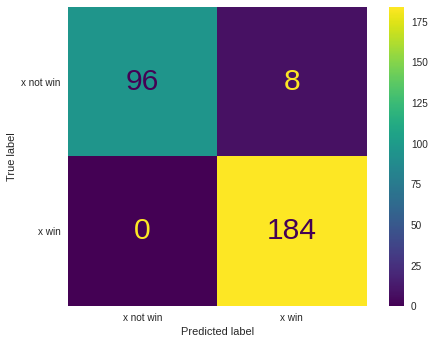

In [113]:
X_ohe=np.zeros((len(X[:,1]),2*len(X[1,:])))

for i in range(len(X[:,1])):
  for j in range(len(X[1,:])):
    if X[i,j]==1:
      X_ohe[i,2*(j)+1]=1
    elif X[i,j]==-1:
      X_ohe[i,2*(j)]=1
    

X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size=0.30, random_state=1)

model_c=LogisticRegression() 
model_c.fit(X_train,y_train)                                
y_pred = model_c.predict(X_test)                          
prob=model_c.predict_proba(X_test)
cm = confusion_matrix(y_test, y_pred)


print(cm)                                                  

disp=ConfusionMatrixDisplay(cm, display_labels=['x not win','x win'])
disp.plot()
plt.rcParams.update({'font.size': 30})
plt.grid(False)
plt.show()


In this case nothing changes.

**Remember that if you want to do this kind of analysis you should always use the validation set to decide. Never tune anything to the test set!**

Solution 3

[[ 18  86]
 [ 10 174]]


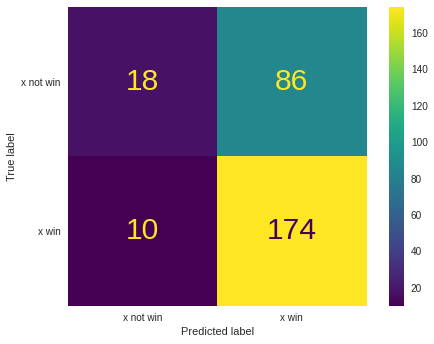

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


from sklearn.decomposition import PCA
pca = PCA(n_components=3)

X_train_proj =  pca.fit_transform(X_train)
X_test_proj = pca.transform(X_test)




model_c=LogisticRegression() 
model_c.fit(X_train_proj,y_train)                                
y_pred = model_c.predict(X_test_proj)                          
prob=model_c.predict_proba(X_test_proj)
cm = confusion_matrix(y_test, y_pred)


print(cm)                                                  

disp=ConfusionMatrixDisplay(cm, display_labels=['x not win','x win'])
disp.plot()
plt.rcParams.update({'font.size': 30})
plt.grid(False)
plt.show()

A very bad performance. This means that probably 3 components of PCA lose too much of the original 9-dimensional information. 

Probably this is because the amount of information carried by PCA components after the 3rd is still very high. Let's check:

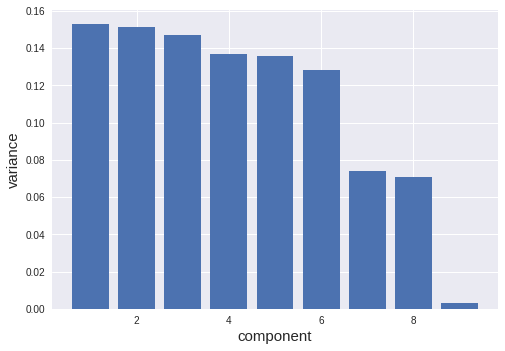

In [115]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
pca.fit(X_train)
variances=pca.explained_variance_ratio_


plt.bar( [1,2,3,4,5,6,7,8,9],variances)
plt.xlabel('component', fontsize=15);
plt.ylabel('variance', fontsize=15);



Indeed from 1 to 6 they seem to be almost equally important.

**Take home message: when possible do not train your model on embedded data, try to always use the full data to not lose important information**

Solution 5

To reduce the number of false positive we can do the exact same procedure we used for the breast cancer dataset. We need to introdcue a validation set.

Sadly the false positives are already 0 so we do the same reasoning trying to reduce the false negatives:

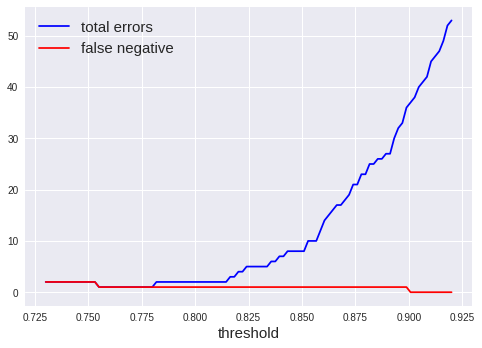

In [128]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=1)
X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)   # 15% test and 15% validation


model_c=LogisticRegression() 
model_c.fit(X_train,y_train)                                
y_pred = model_c.predict(X_valid)                           
prob=model_c.predict_proba(X_valid)
cm = confusion_matrix(y_valid, y_pred)


total_error = np.zeros(0)
false_negative = np.zeros(0)
threshold=np.linspace(0.73,0.92,100)

y_treshold=np.zeros(X_valid.shape[0])


for thr in threshold:
  y_treshold=np.zeros(X_valid.shape[0])
  for i in range(len(y_treshold)):
    if prob[i,1]>=thr:
      y_treshold[i]=1
    else:
      y_treshold[i]=0
  cm = confusion_matrix(y_valid, y_treshold)
  total_error = np.append(total_error,cm[0,1]+cm[1,0])
  false_negative = np.append(false_negative, cm[0,1])

plt.plot(threshold,total_error, c='blue', label='total errors')
plt.plot(threshold, false_negative, c='red',label='false negative')
plt.xlabel('threshold', fontsize=15)
plt.legend(loc="upper left", fontsize=15)


To go to zero false negative we end up with a model that makes too many errors. A good solution is setting the threshold at 0.76 where we have only one false negative and the best performance possible for the model.

# Exercise: Can machine learning learn physics?

Simple physics problem: we have a scale with two arms. We put a weight on the left arm at a certain distance from the center and onther weight on the rigth arm at another distance from the center. Will the scale lean to the left/right or will it stay balanced?
The data is 4 dimensional and each feature is a number between 1 and 5. The first feature is the weight on the left arm, the second is its distance from the center, the third is the weigth on the right arm and the fouth is its distance from the center. The label are R B or L (right/left/balanced).

1. Train a model to predict the label.
2. Perform a dimensional reduction technique and plot coloring according to the label and the classification
3. Can you think of a **really suited** 2D dimensional reduction for this problem?
4. Train a model using the projected data for training, what happens?
5. Classify all the 2D space and draw the real curve of separation between the regions.



In [129]:
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data", header=None)
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

Solution 1

[[ 6  0  3]
 [ 4 79  1]
 [ 2  0 62]]


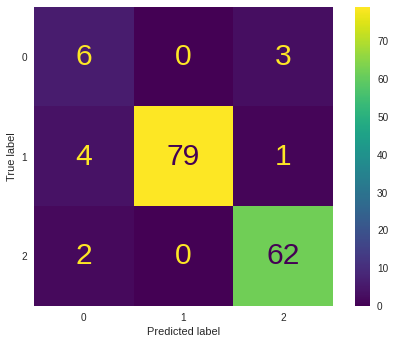

In [137]:
weak_classifier = DecisionTreeClassifier(max_depth=1,random_state=5)                            # here we define the weak classifier                
strong_classifier = AdaBoostClassifier(n_estimators = 50, base_estimator = weak_classifier)     # here we build the strong classifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=314)  

model = strong_classifier.fit(X_train, y_train)

model.fit(X_train,y_train)                                
y_pred = model.predict(X_test)                          
cm = confusion_matrix(y_test, y_pred)


print(cm)                                                  

disp=ConfusionMatrixDisplay(cm) 
disp.plot()
plt.rcParams.update({'font.size': 30})
plt.grid(False)
plt.show()

now we sunderstand what the labels of the confusion matrix stand for.

We see that  we predict 12 label zero in the cm, 79 label 1 and 66 label 2. Let't take a look to y_pred:

In [138]:
y_pred

array(['L', 'R', 'B', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'L', 'R', 'L',
       'L', 'L', 'L', 'B', 'L', 'R', 'R', 'B', 'R', 'B', 'R', 'R', 'L',
       'L', 'B', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'R', 'R', 'R',
       'R', 'R', 'B', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'L',
       'R', 'L', 'L', 'L', 'L', 'R', 'R', 'R', 'L', 'L', 'L', 'R', 'R',
       'B', 'L', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'R',
       'L', 'B', 'R', 'L', 'B', 'R', 'L', 'L', 'R', 'R', 'L', 'L', 'R',
       'R', 'L', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'R', 'L', 'L',
       'L', 'L', 'L', 'L', 'L', 'L', 'L', 'R', 'B', 'L', 'R', 'L', 'R',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'R',
       'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'L',
       'L', 'R', 'B', 'L', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'L', 'L',
       'B'], dtype=object)

In [140]:
print(len(y_pred[y_pred=='R']))

66


from this it is evident that R=2, L=1, B=0

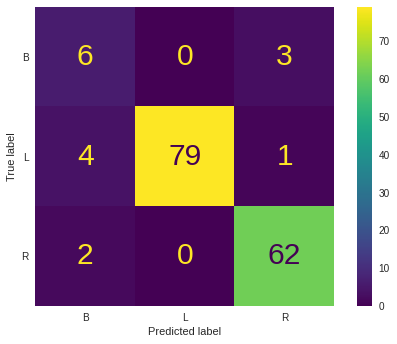

In [141]:
disp=ConfusionMatrixDisplay(cm, display_labels=['B','L','R'])
disp.plot()
plt.rcParams.update({'font.size': 30})
plt.grid(False)
plt.show()

Solution 2

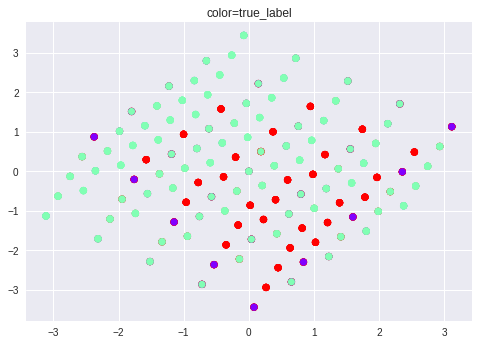

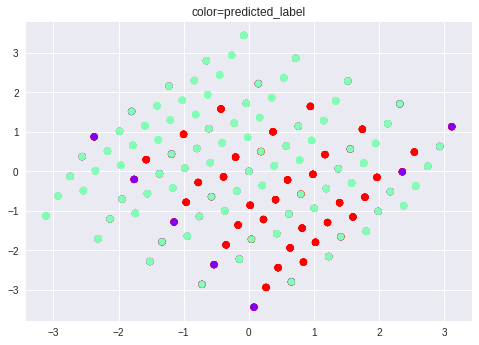

In [163]:
from sklearn.decomposition import PCA
import matplotlib

y_numerical=np.zeros(len(y))

for i in range(len(y)):
  if y[i]=='L':
    y_numerical[i]=1
  elif y[i]=='R':
     y_numerical[i]=2
  





pca = PCA(n_components=2, random_state=314)  #also the PCA has a random state, usually there is no difference but sometimes there are equally informative directions and it 
X_proj=pca.fit_transform(X)                  #decides randomly

plt.figure()
plt.scatter(X_proj[:, 0], X_proj[:, 1],  c=y_numerical, cmap='rainbow')
plt.title('color=true_label')
plt.show()


X_train, X_test, y_train, y_test = train_test_split(X, y_numerical, random_state=314)  
model = strong_classifier.fit(X_train, y_train)
model.fit(X_train,y_train)                                
y_pred = model.predict(X)   

plt.figure()
plt.scatter(X_proj[:, 0], X_proj[:, 1],  c=y_pred, cmap='rainbow')
plt.title('color=predicted_label')
plt.show()


Solution 3 - 4 - 5

The dimensional reduction in question is:


1.   First dimension = Arm x Weigth to the left
2.   Second dimension = Arm x Weight to the right



[[ 7  1  1]
 [ 4 80  0]
 [ 7  0 57]]


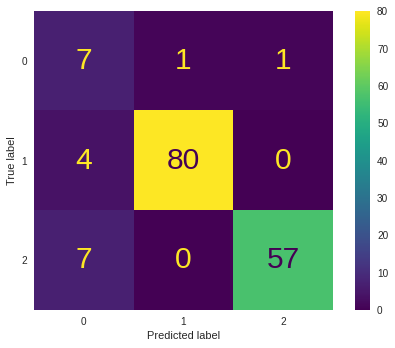

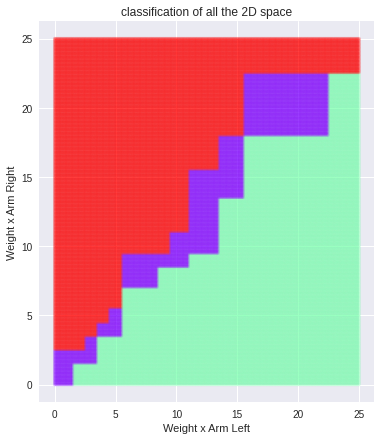

In [174]:
X_2D=np.zeros((len(X[:,1]),2))

for i in range(len(X[:,1])):
  X_2D[i,0]=X[i,0]*X[i,1]
  X_2D[i,1]=X[i,2]*X[i,3]

X_train, X_test, y_train, y_test = train_test_split(X_2D, y_numerical, random_state=314)  
model = strong_classifier.fit(X_train, y_train)
model.fit(X_train,y_train)                                
y_pred = model.predict(X_test) 
cm = confusion_matrix(y_test, y_pred)


print(cm)                                                  

disp=ConfusionMatrixDisplay(cm) 
disp.plot()
plt.rcParams.update({'font.size': 30})
plt.grid(False)
plt.show()  

gx = np.linspace(0,25, 256)                         
gy = np.linspace(0,25, 256)                            
gx, gy = np.meshgrid(gx, gy)
gx, gy = gx.reshape(-1), gy.reshape(-1)

y_hat = model.predict(np.c_[gx, gy]) 

plt.figure(figsize=(6,7))                                     
plt.scatter(gx, gy, c=y_hat, alpha=0.2, s=10,cmap='rainbow')
plt.xlabel('Weight x Arm Left')
plt.ylabel('Weight x Arm Right')
plt.title('classification of all the 2D space')

plt.show()




We do not have the usual drop in performance that you expect when you reduce the number of dimension. This is because all the necessary information to see where does the scale lean is retained in the embedding!

We see that the architecture has somehow an *understanding* of the physics. It recognizes the regions of leaning left/right divided by the equilibrium violet line. 

watch this video! https://www.youtube.com/watch?v=2Bw5f4vYL98